# PUI Homework 5: Assignment 1 - Testing the Z-test

## 1. Importing the libraries

In [1]:
__author__ = 'Ruben Hambardzumyan, rh2684'

# Importing the libraries

from __future__ import print_function
import pylab as pl
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# Specifying the significance level

alpha = 0.05

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Specifying the random seed for reprodusibility

np.random.seed(1988)

## 2. Generating Wald distribution

Draw samples from a Wald, or inverse Gaussian, distribution. References:

numpy.random.wald: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.wald.html#numpy.random.wald

Wikipedia: https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

The Wald distribution takes three parameters:

<b>mean, $\mu$:</b> Distribution mean, should be > 0.<br/>

<b>scale, $\lambda$:</b> Scale parameter, should be >= 0.<br/>

<b>size, $n$:</b> Output shape (sample size).<br/>

In this case, $\mu=\lambda$, $Variance: \sigma^2=\mu^3/\lambda$


In [3]:
# Specifying the population parameters

NSamples = 1000 # amount of samples
nSize = 150 # size of samples
mu = 50 # mean
lam = 50 #scale
sigma = np.sqrt(mu ** 3 / lam) # standard deviation

# Populating and array of empty means

means = np.zeros(NSamples)

for i in range(NSamples):
    dist = np.random.wald(mean=mu, scale=lam, size=nSize)
    means[i] = dist.mean()

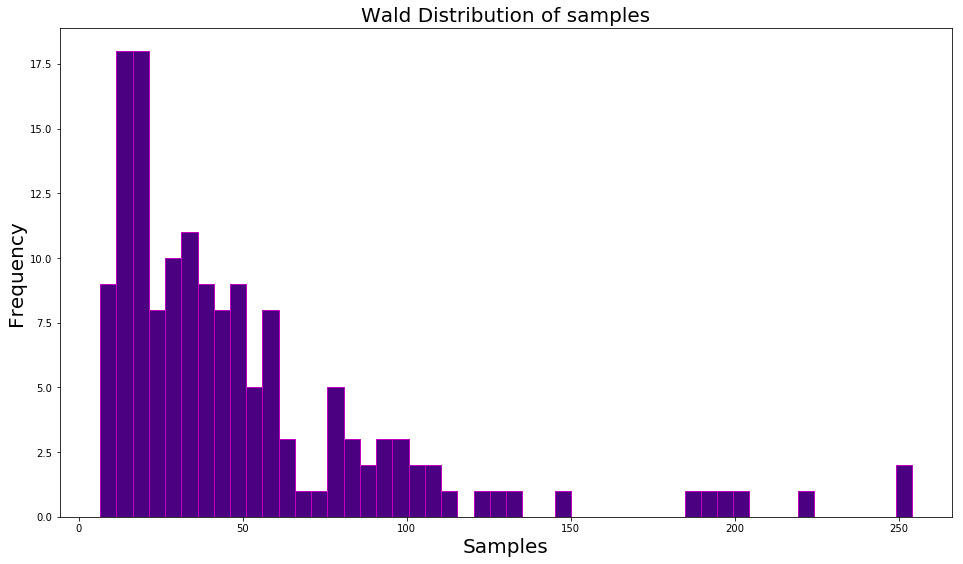

In [4]:
pl.figure(figsize(16,9))

pl.hist(dist, bins=50, facecolor='indigo', edgecolor='m');
pl.xlabel('Samples', fontsize=20)
pl.ylabel('Frequency', fontsize=20)
pl.title('Wald Distribution of samples', fontsize=20)

### Figure 2.1: The image above shows the Wald distribution of all the samples in the range of 'NSamples'. The distribution is inverted Gaussian.

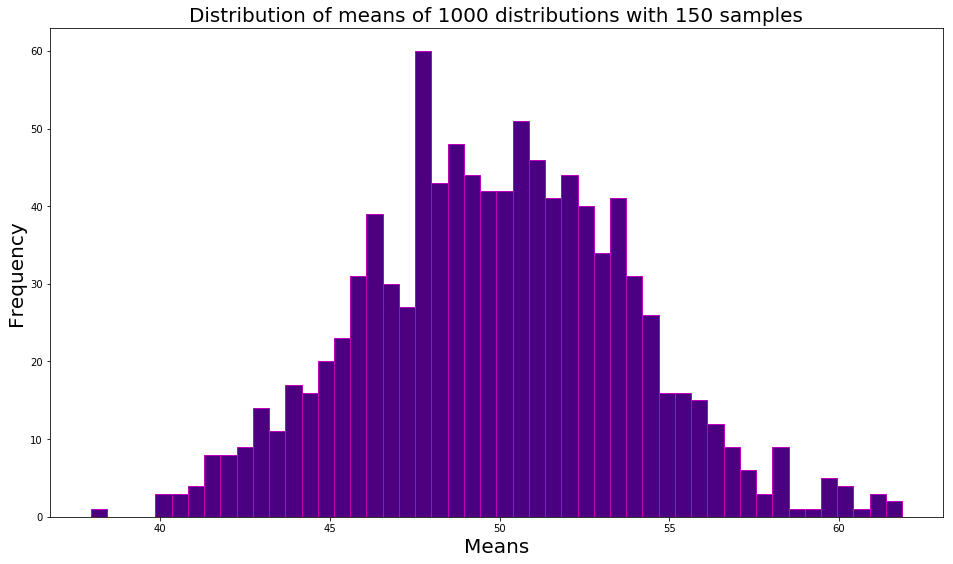

In [5]:
pl.figure(figsize(16,9))

pl.hist(means, bins=50, facecolor='indigo', edgecolor='m');
pl.xlabel('Means', fontsize=20)
pl.ylabel('Frequency', fontsize=20)
pl.title('Distribution of means of 1000 distributions with 150 samples', fontsize=20)

### Figure 2.2: The image above shows the distribution of means of all samples.

## 3. Z scores for all means

The z-score is calculated according to the following equation:

$$
z=\frac{Mean(Population) - Mean(Sample)}{\frac{\sigma}{\sqrt{N}}}
$$

In [6]:
# getting the Z scores for all the samples

zScore = (mu - means) / (np.sqrt(means) / np.sqrt(NSamples))

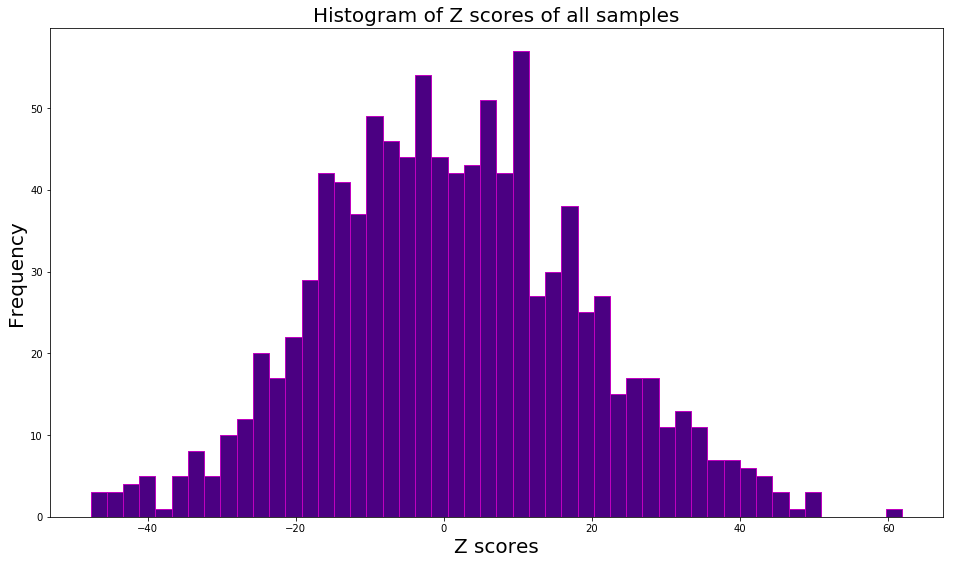

In [7]:
# plotting the Z scores of all samples

pl.figure(figsize(16,9))

pl.hist(zScore, bins=50, facecolor='indigo', edgecolor='m');
pl.xlabel('Z scores', fontsize=20)
pl.ylabel('Frequency', fontsize=20)
pl.title('Histogram of Z scores of all samples', fontsize=20)

### Figure 3.1: The image above shows the histogram of Z scores of all samples.

## 4. Assessing the Z score

In order to assess the goodness of fit of Z scores, we need to compare the distribution of Z scores with a Normal distribution N(0, 1), where mean is 0 and the standard deviation is 1. Choosing Anderson-Darling test.

<b>The Null Hypothesis (H0)</b>: The Normal distribution N(0,1) fits the Z score distribution.

In [8]:
anderson = sp.stats.anderson(zScore, 'norm')
print(anderson)

AndersonResult(statistic=0.74735235662615196, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Since our significance level was specified as 5% (alpha = 0.05), we need to compare the third value of the first array of critical values with the value of Anderson-Darling test result statistic, which is 0.747 for our case. Here, the critical value of the distribution of Z scores is 0.784, which is greater than 0.747, therefore, the Null Hypothesis holds, which means that the Normal distribution N(0, 1) fits the Z score fistribution (The Z score is Gaussian).